In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from numpy import genfromtxt

In [2]:
#load data
fileName = '../EGFPv EXP8-processed.csv'
recording = genfromtxt('../EGFPv EXP8-recording.csv', delimiter=',')
idx = genfromtxt('../EGFPv EXP8-init_end.csv', delimiter=',')


#create pandas dataframe
df = pd.read_csv(fileName, header=None)
df.columns = ['I_max[pA]', 't_half[ms]', 'Q[pC]', 'I_foot[pA]', 't_foot[ms]', 'Q_foot[pC]', 't_init', 't_peak','t_foot', 't_end']

In [3]:
def plot_spikes(df,idx, recording, flag):
    index_review = np.array(df.index)
    rows = int(np.ceil(np.sqrt(len(df))))
    cols = int(np.ceil(np.sqrt(len(df))))
    plt.figure(figsize=(50, 30))
    k=1
    for i,j in idx[index_review].astype('int'):
        init = i
        end = j
        plt.subplot(rows,cols,k)
        plt.plot(recording[init:end,0], recording[init:end,1], label = 'spike ' + str(k-1))
        k+=1
        plt.legend()
        if(flag==True):
            plt.grid('off')
            plt.axis('off')
    plt.show()



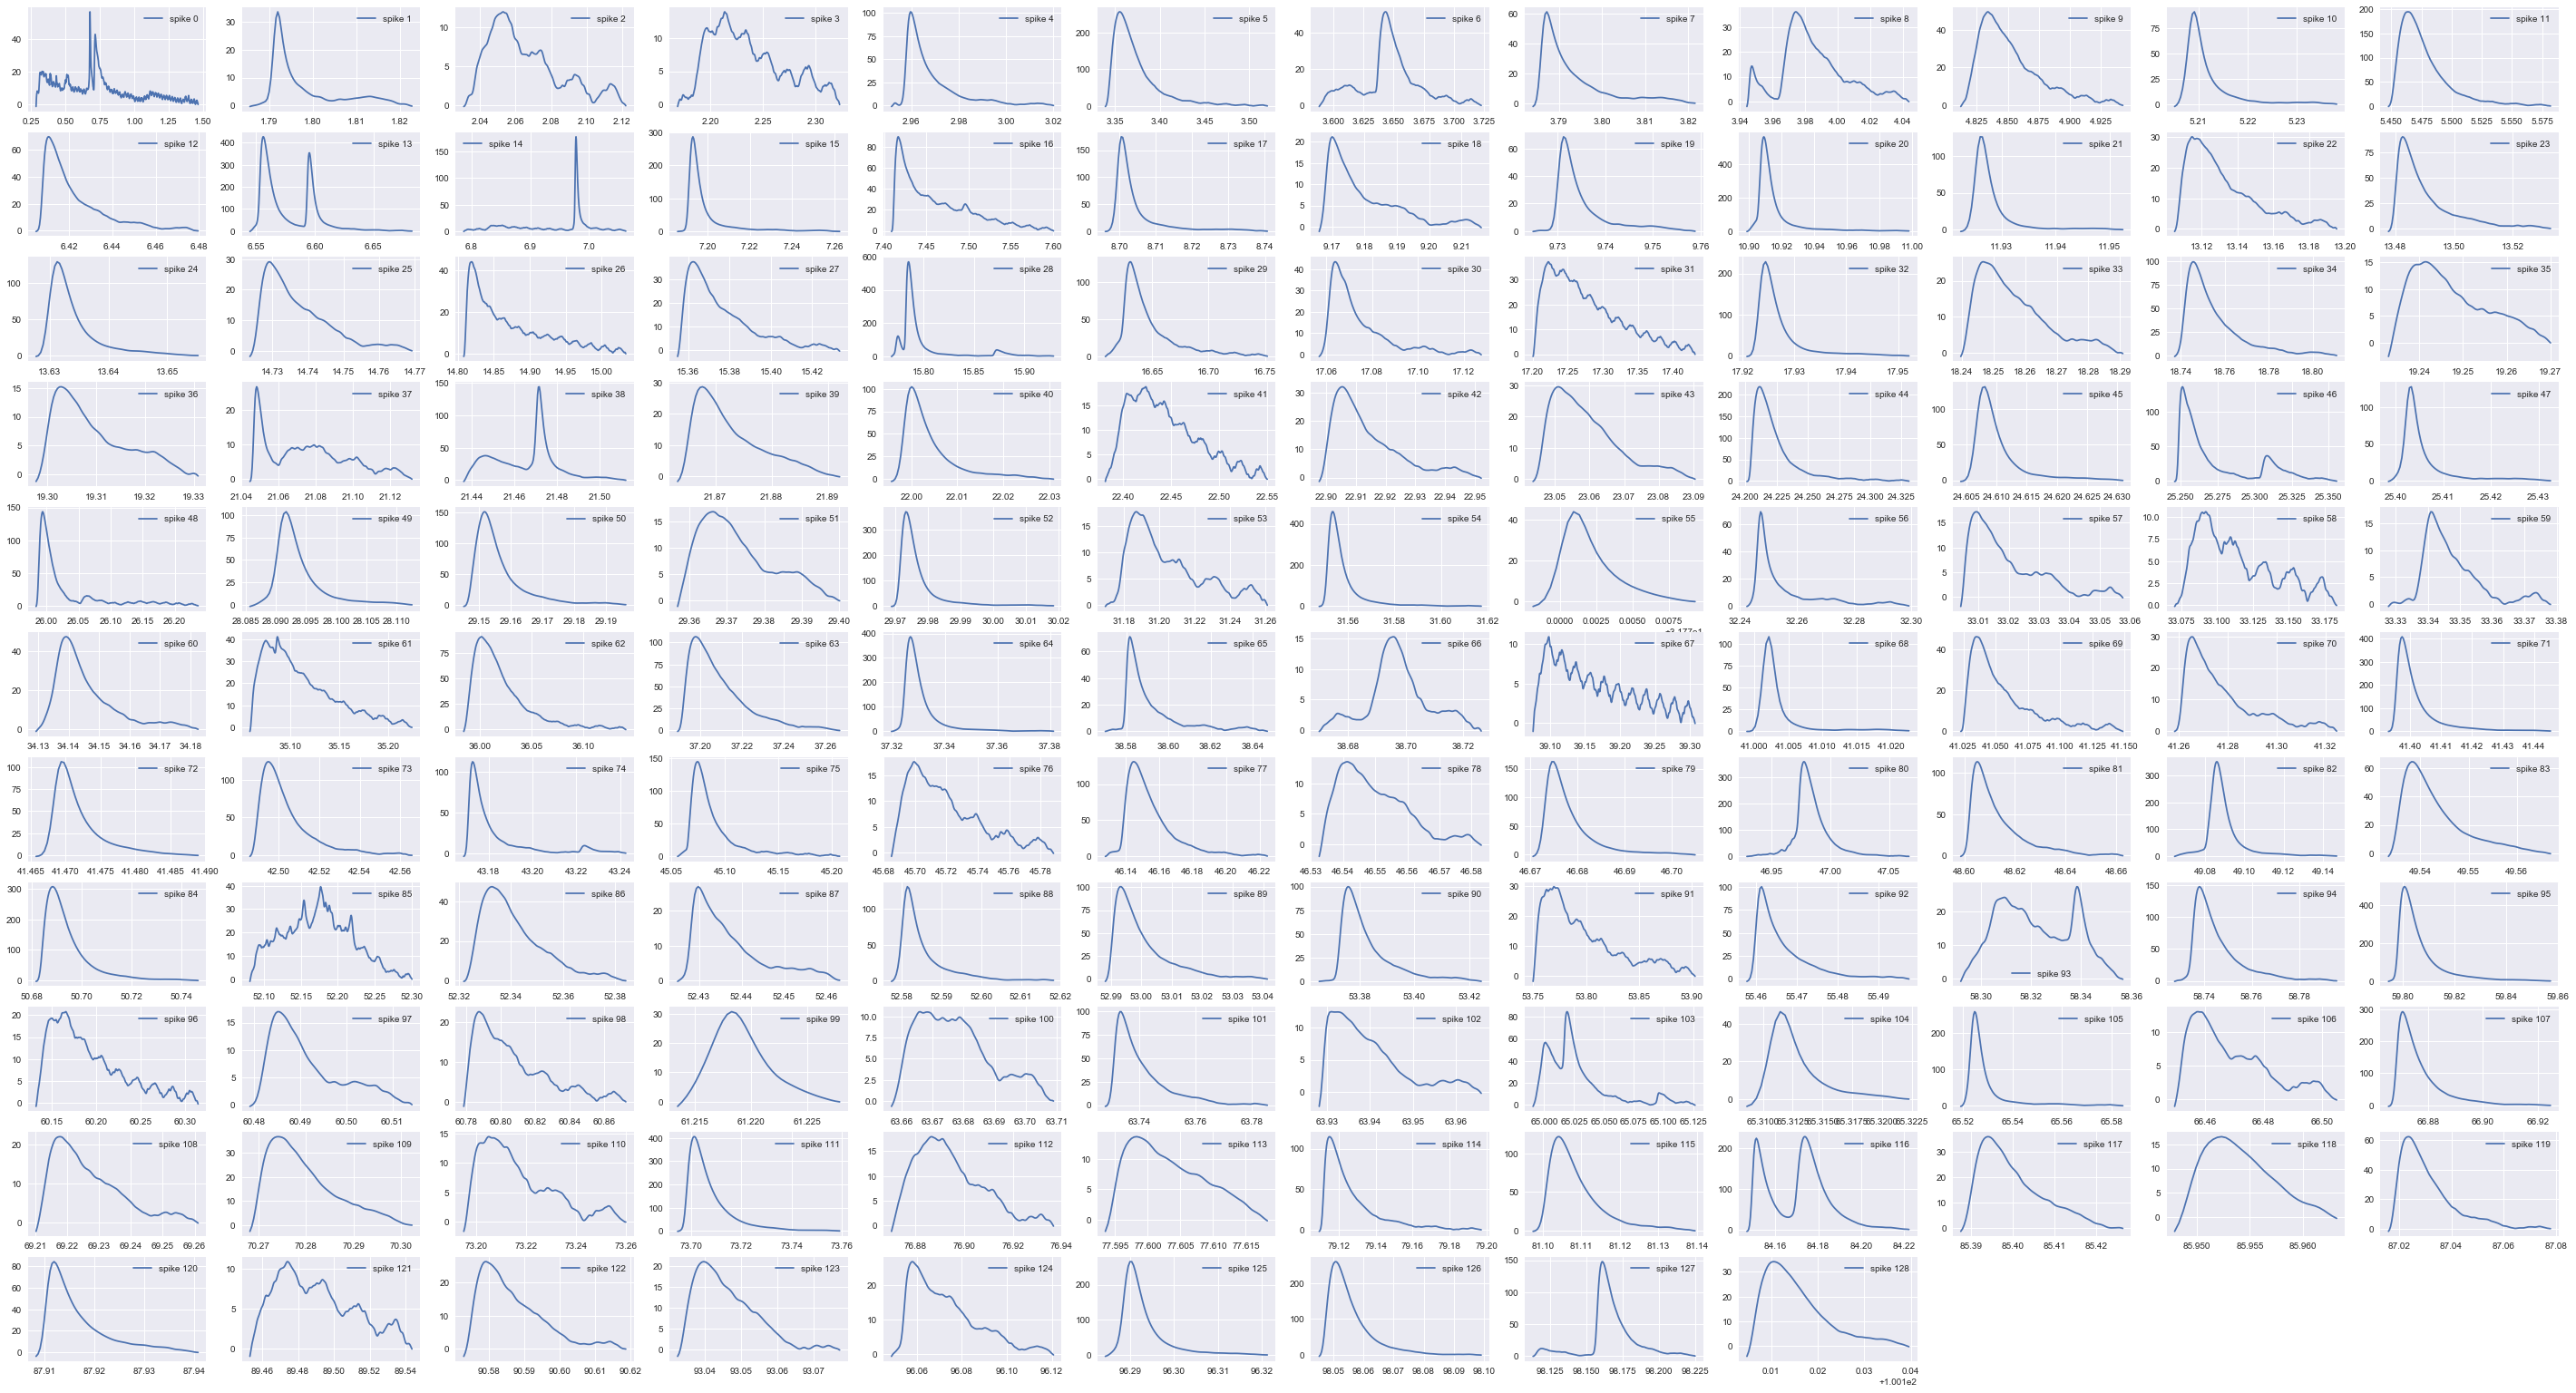

In [12]:
plot_spikes(df,idx, recording, False)

In [4]:
discarded = [0,2,3,8,13,31,35,37,41,51,53,58,61,67,76,78,85,91,93,96,98,100, 102, 103, 106,110,112,113,116,118,121]
index_review = np.array(df.index)
remove = index_review[discarded]
#remove
df = df.drop(remove)

In [5]:
#Correction of constants
df['t_half[ms]'] = df['t_half[ms]'].apply(lambda x: x*1000) #now in ms
df['Q[pC]'] = df['Q[pC]'].apply(lambda x: x/1000) #now in pC
df['t_foot[ms]'] = df['t_foot[ms]'].apply(lambda x: x*1000) #now in ms
df['Q_foot[pC]'] = df['Q_foot[pC]'].apply(lambda x: x/1000) #now in pC


In [6]:
df.head(7)#b = cleaned[cleaned['t_foot[ms]']>0.003]

,I_max[pA],t_half[ms],Q[pC],I_foot[pA],t_foot[ms],Q_foot[pC],t_init,t_peak,t_foot,t_end
1,33.460918,5.200021,0.017944,2.480329,4.400018,0.000057,1.785607,1.790007,1.792007,1.823207
4,101.097481,9.200037,0.196979,3.769959,4.800019,0.000125,2.951612,2.956412,2.959612,3.020412
5,257.271423,32.000128,4.279536,11.007598,2.400010,0.000098,3.339213,3.341613,3.355213,3.520414
6,51.530125,21.600086,0.524058,11.130162,47.200188,0.042094,3.588414,3.635615,3.643215,3.722815
7,61.062481,6.800027,0.044357,-1.070085,0.800003,0.000005,3.784015,3.784815,3.787215,3.822015
9,49.431644,42.400169,0.711975,2.406648,3.600014,0.000047,4.812019,4.815619,4.834019,4.943220
10,91.389244,5.200021,0.037066,1.825098,1.200005,0.000015,5.205221,5.206421,5.209221,5.238421


In [7]:
with_foot = df[df['t_foot[ms]']>3]
without_foot = df[df['t_foot[ms]']<=3]
with_foot_amplitude = with_foot[with_foot['I_foot[pA]']>3] 
with_foot_none = with_foot[with_foot['I_foot[pA]']<=3] 

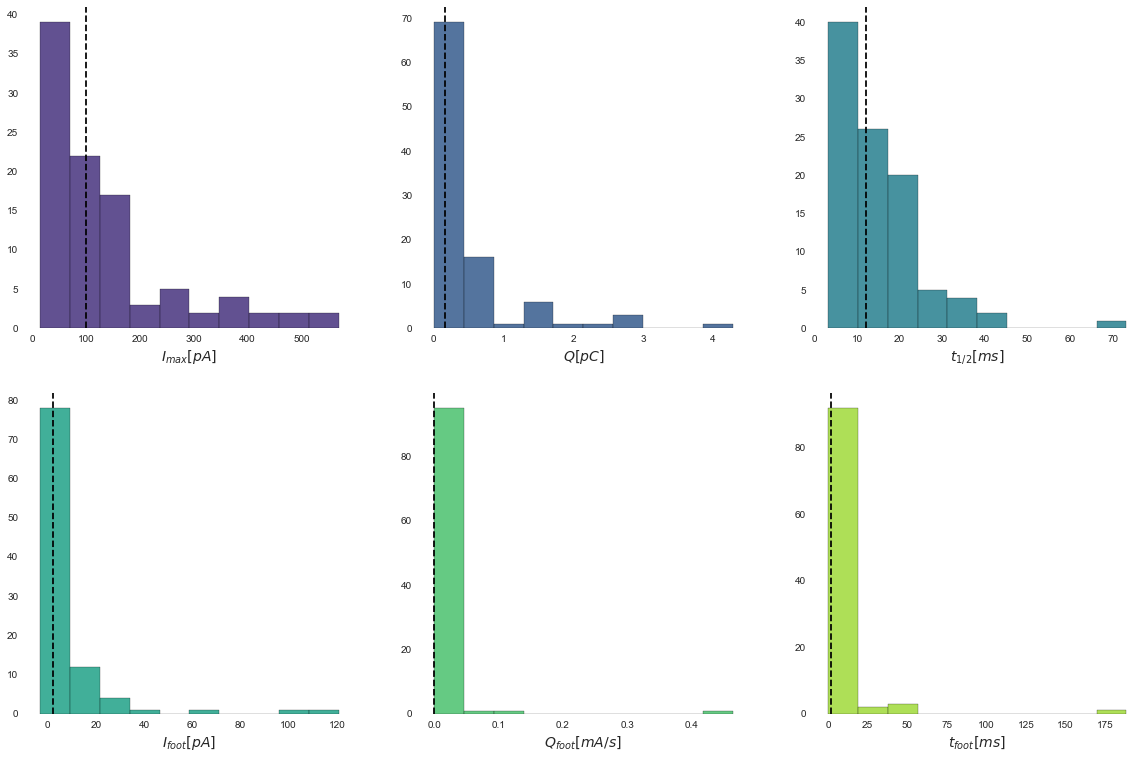

In [19]:
fig, axes = plt.subplots(2, 3,figsize=(20, 13), sharex=False)
color = sns.color_palette("viridis", n_colors=6)

axes[0, 0].hist(df['I_max[pA]'], bins=10 , color = color[0], alpha = 0.85, histtype='bar', ec='black')
axes[0, 0].axvline(np.median(df['I_max[pA]']), ls = '--', color = 'black')
axes[0, 0].set_xlabel('$I_{max}[pA]$', fontsize = 14)
axes[0, 0].grid('off')
axes[0, 0].set_facecolor('white')


axes[0, 1].hist(df['Q[pC]'], color = color[1], alpha = 0.85, histtype='bar', ec='black')
axes[0, 1].axvline(np.median(df['Q[pC]']), ls = '--', color = 'black')
axes[0, 1].set_xlabel('$Q[pC]$', fontsize = 14)
axes[0, 1].grid('off')
axes[0, 1].set_facecolor('white')


axes[0, 2].hist(df['t_half[ms]'],  color = color[2], alpha = 0.85, histtype='bar', ec='black')
axes[0, 2].axvline(np.median(df['t_half[ms]']), ls = '--', color = 'black')
axes[0, 2].set_xlabel('$t_{1/2}[ms]$', fontsize = 14)
axes[0, 2].grid('off')
axes[0, 2].set_facecolor('white')


axes[1, 0].hist(df['I_foot[pA]'],  color = color[3], alpha = 0.85, histtype='bar', ec='black')
axes[1, 0].axvline(np.median(df['I_foot[pA]']), ls = '--', color = 'black')
axes[1, 0].set_xlabel('$I_{foot}[pA]$', fontsize = 14)
axes[1, 0].grid('off')
axes[1, 0].set_facecolor('white')


axes[1, 1].hist(df['Q_foot[pC]'],  color = color[4], alpha = 0.85, histtype='bar', ec='black')
axes[1, 1].axvline(np.median(df['Q_foot[pC]']), ls = '--', color = 'black')
axes[1, 1].set_xlabel('$Q_{foot}[mA/s]$', fontsize = 14)
axes[1, 1].grid('off')
axes[1, 1].set_facecolor('white')

axes[1, 2].hist(df['t_foot[ms]'],  color = color[5], alpha = 0.85, histtype='bar', ec='black')
axes[1, 2].axvline(np.median(df['t_foot[ms]']), ls = '--', color = 'black')
axes[1, 2].set_xlabel('$t_{foot}[ms]$', fontsize = 14)
axes[1, 2].grid('off')
axes[1, 2].set_facecolor('white')

plt.show()




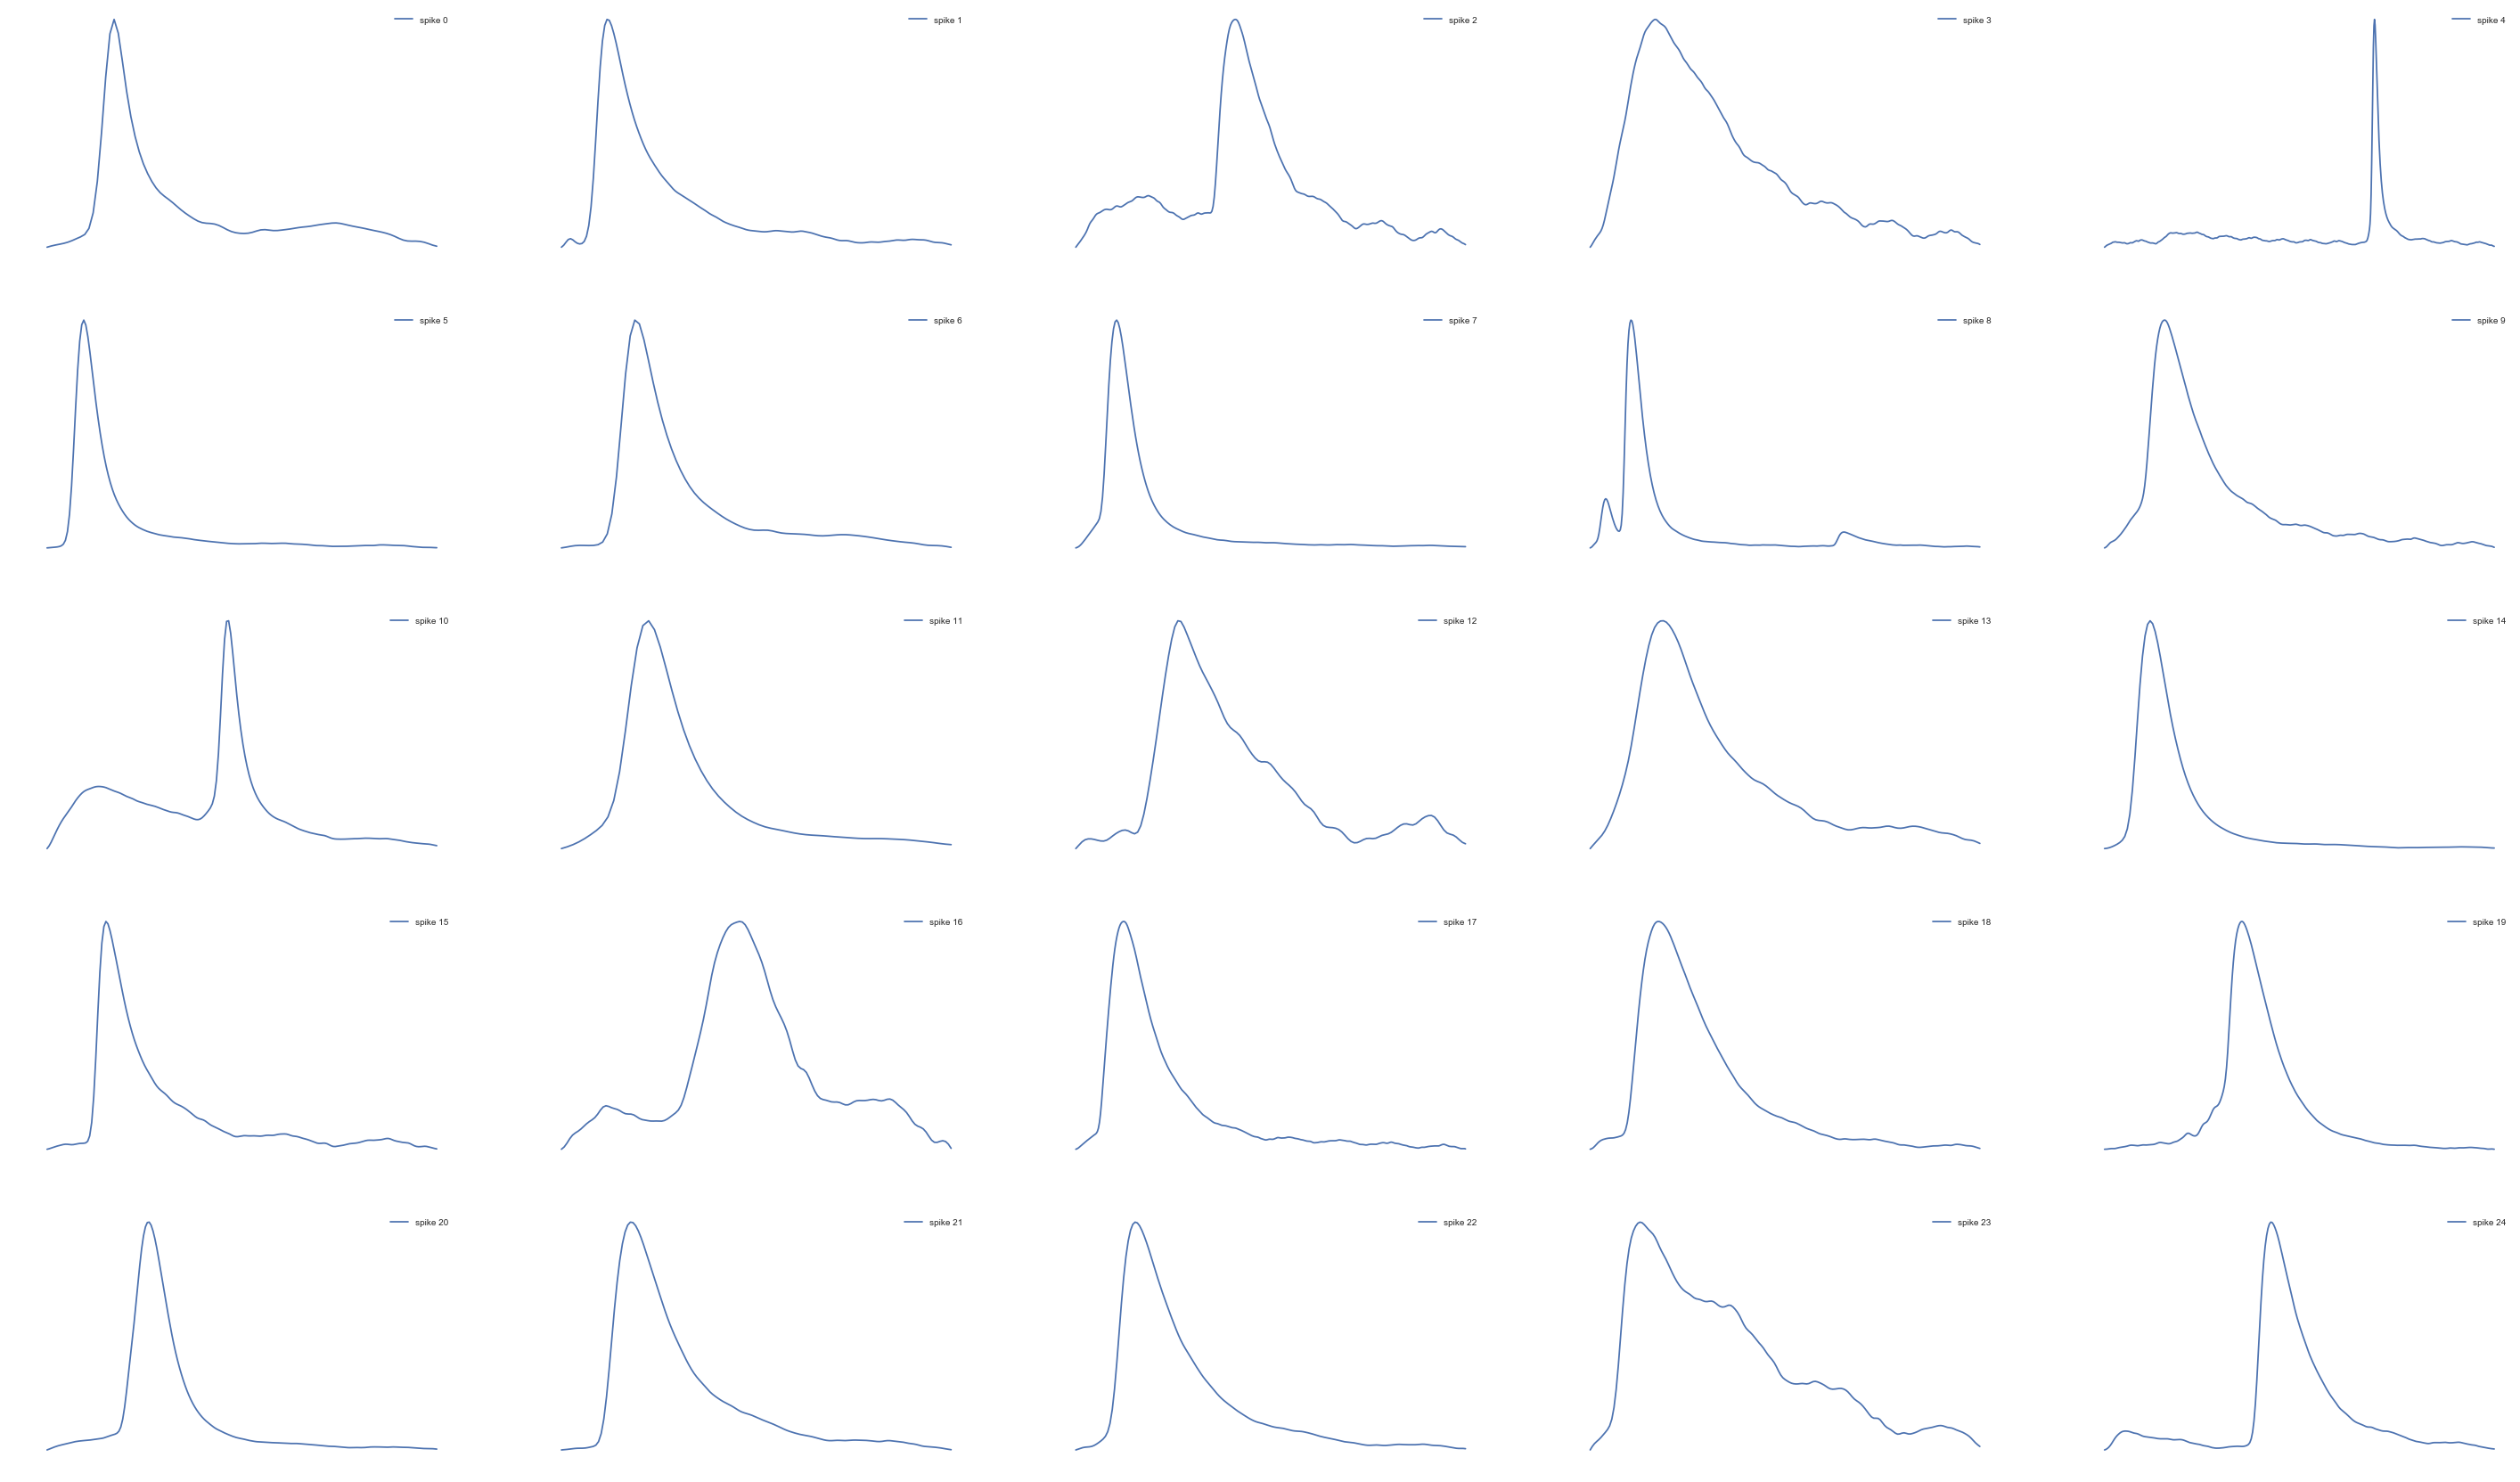

In [20]:
plot_spikes(with_foot,idx, recording, True)

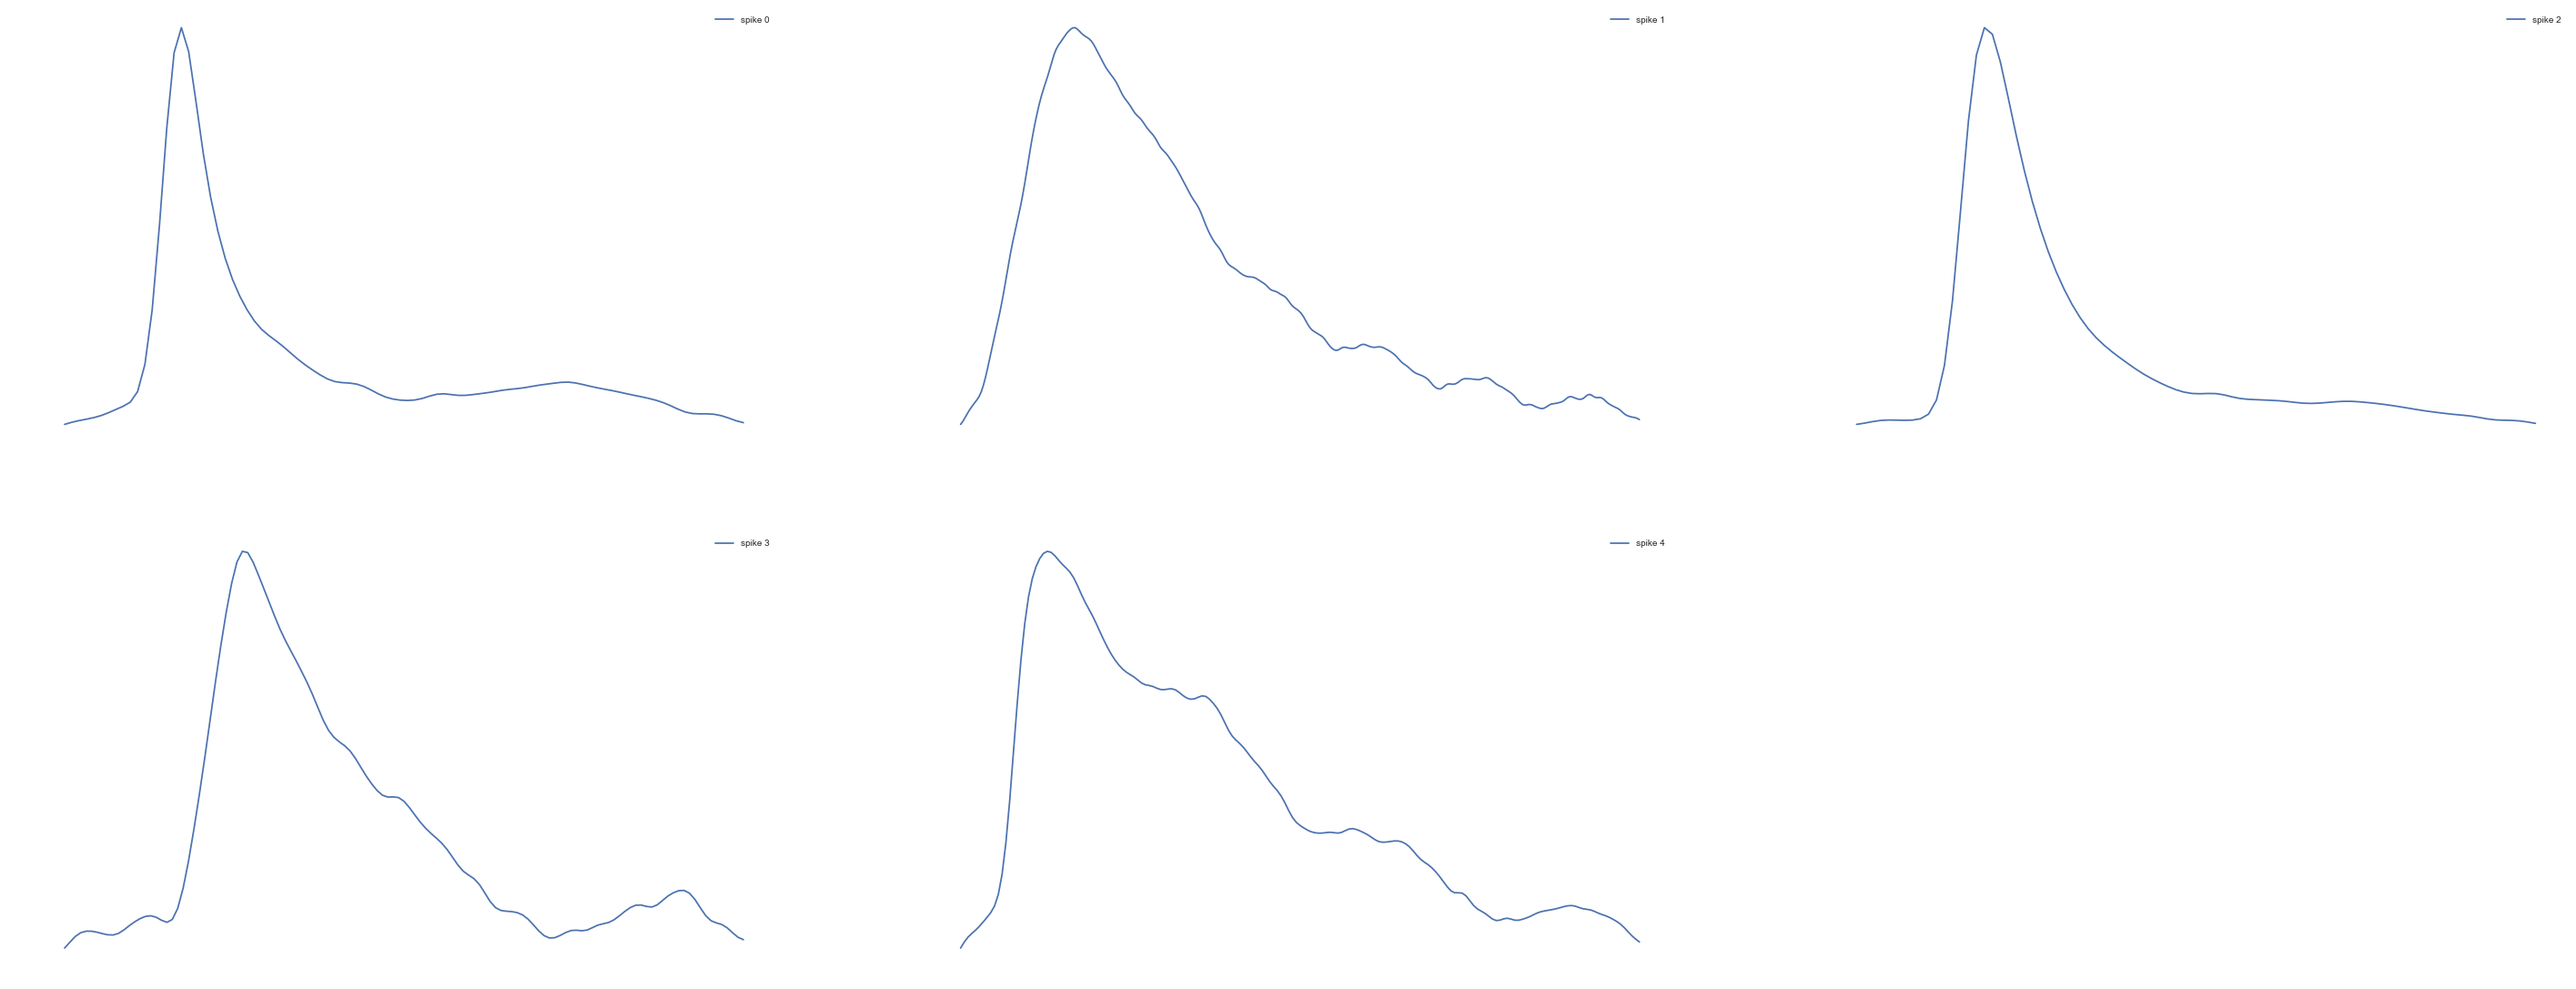

In [21]:
plot_spikes(with_foot_none,idx, recording, True)

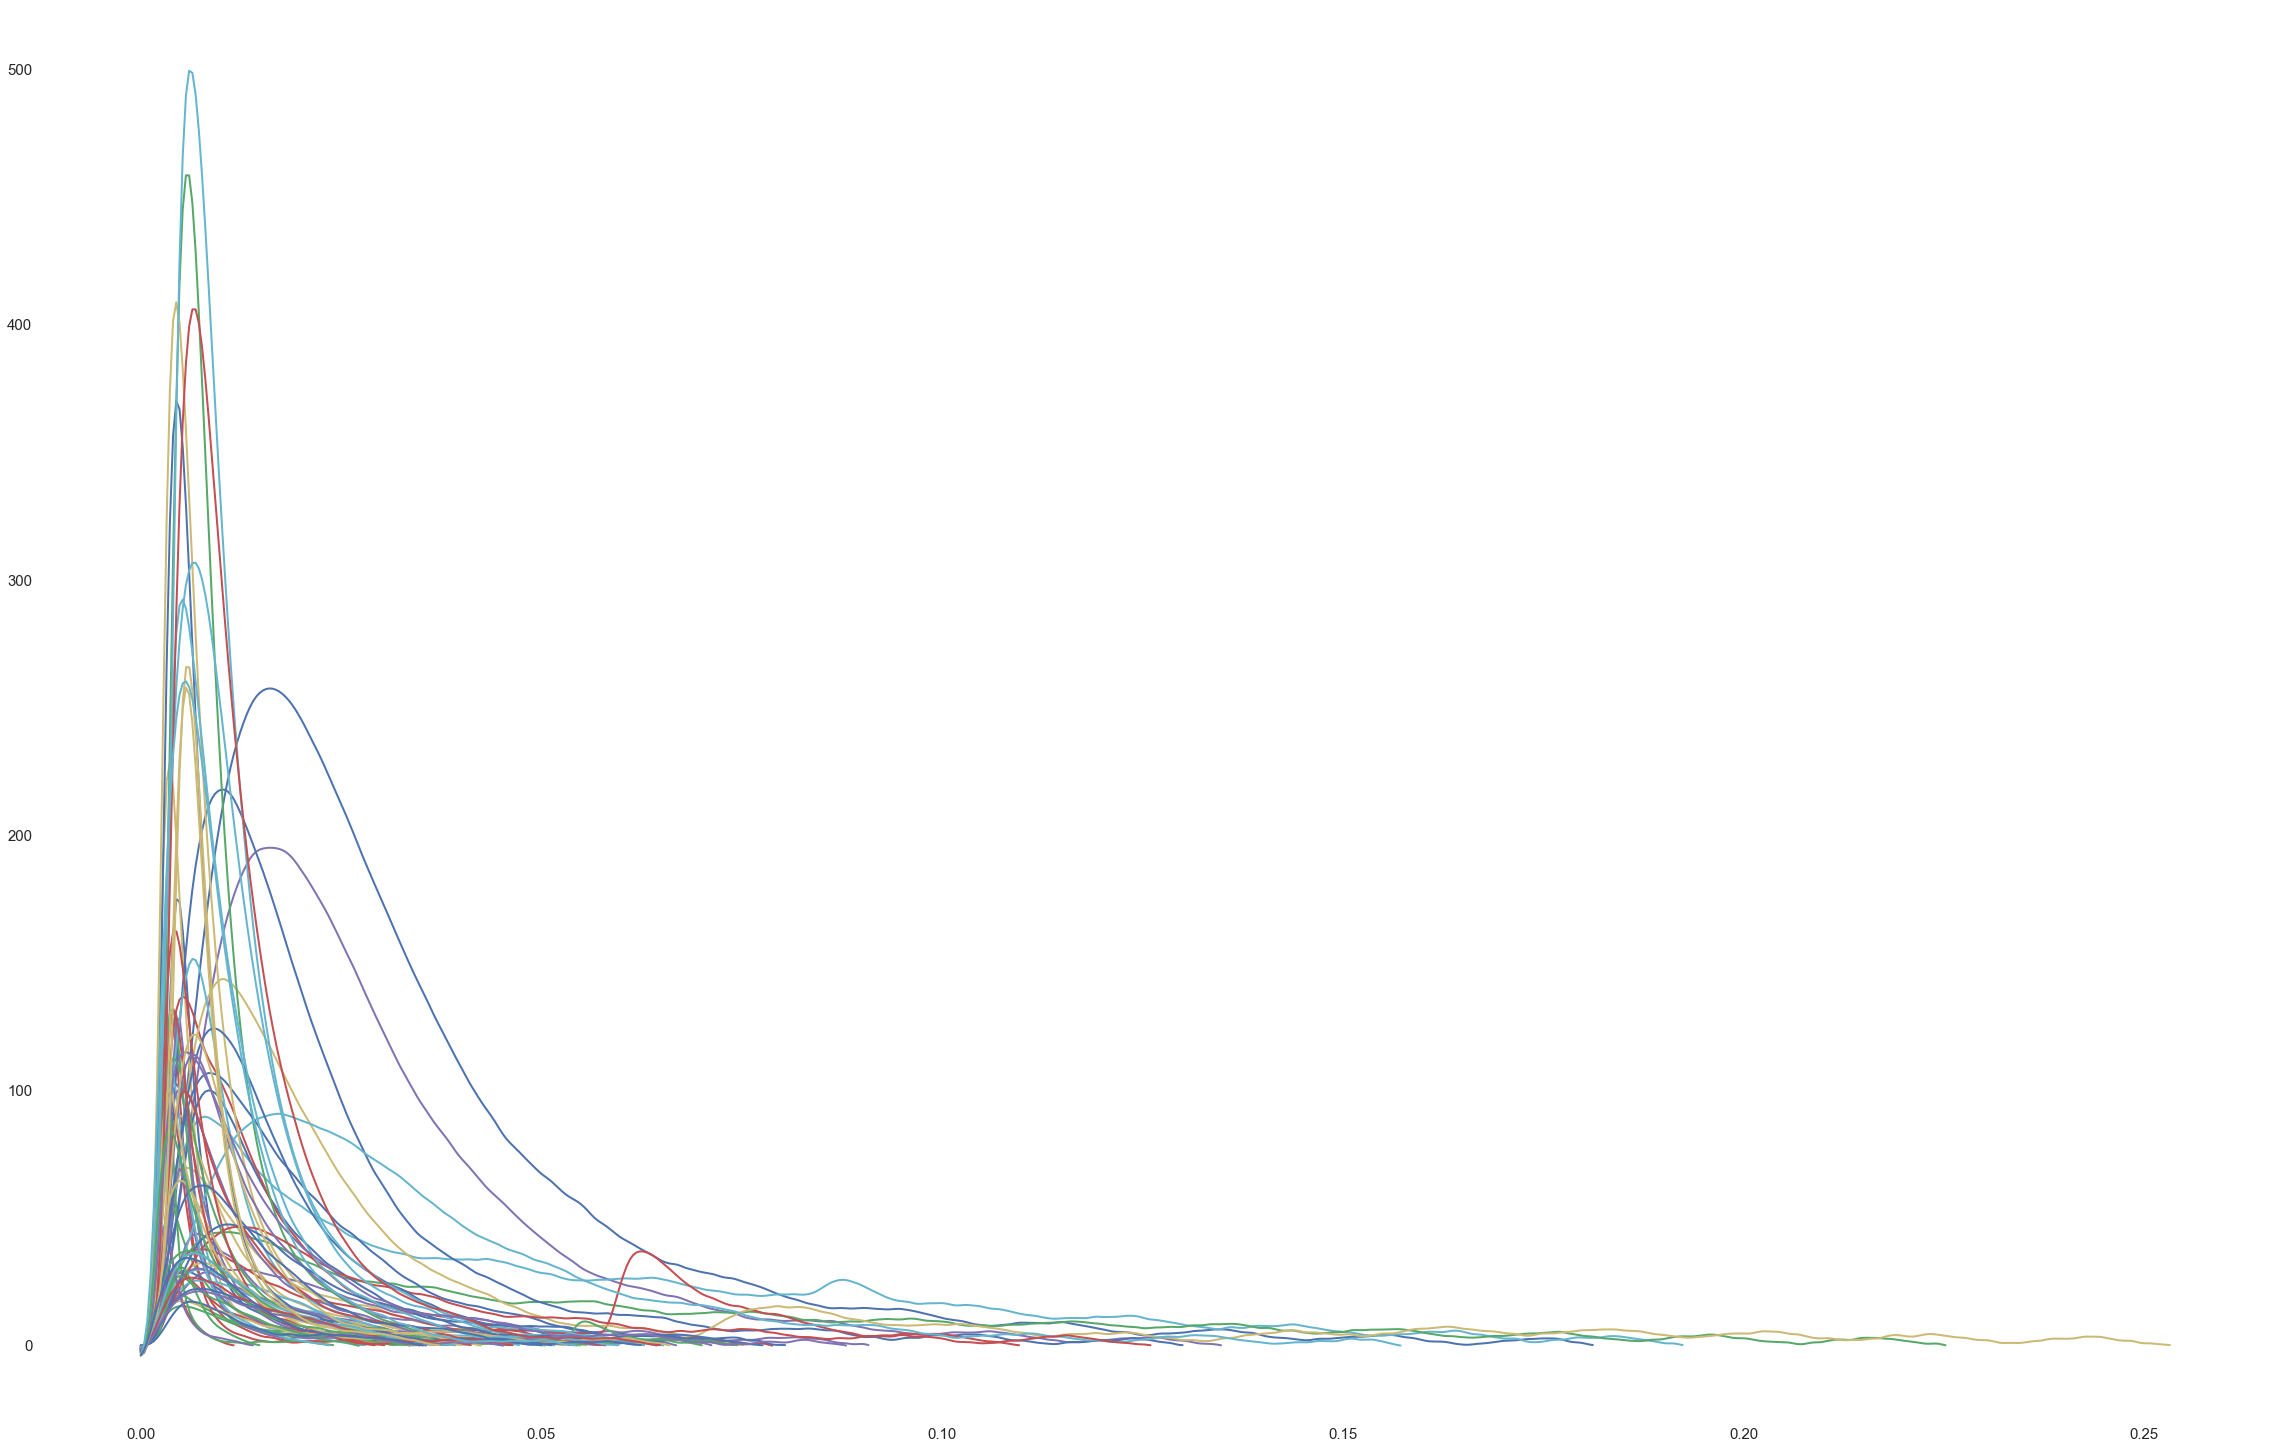

In [50]:
index_review = np.array(without_foot.index)
rows = int(np.ceil(np.sqrt(len(df))))
cols = int(np.ceil(np.sqrt(len(df))))

fig, axes = plt.subplots(1,1,figsize=(40, 26), sharex=False)
color = sns.color_palette("viridis", n_colors=4)
k=1
for i,j in idx[index_review].astype('int'):
    init = i
    end = j
    duration = np.linspace(0,recording[end,0]-recording[init,0],len(recording[init:end,0]))
    axes.plot(duration, recording[init:end,1], lw=2)
    axes.set_facecolor('white')
axes.grid('off')

for tick in axes.xaxis.get_major_ticks():
        tick.label.set_fontsize(15) 
for tick in axes.yaxis.get_major_ticks():
        tick.label.set_fontsize(15) 

plt.show()


In [15]:
I_medians = [np.median(df['I_max[pA]']),
             np.median(without_foot['I_max[pA]']),
            np.median(with_foot_amplitude['I_max[pA]'])]
Q_medians = [np.median(df['Q[pC]']),
             np.median(without_foot['Q[pC]']),
            np.median(with_foot_amplitude['Q[pC]'])]
t_medians = [np.median(df['t_half[ms]']),
             np.median(without_foot['t_half[ms]']),
             np.median(with_foot_amplitude['t_half[ms]']) ]

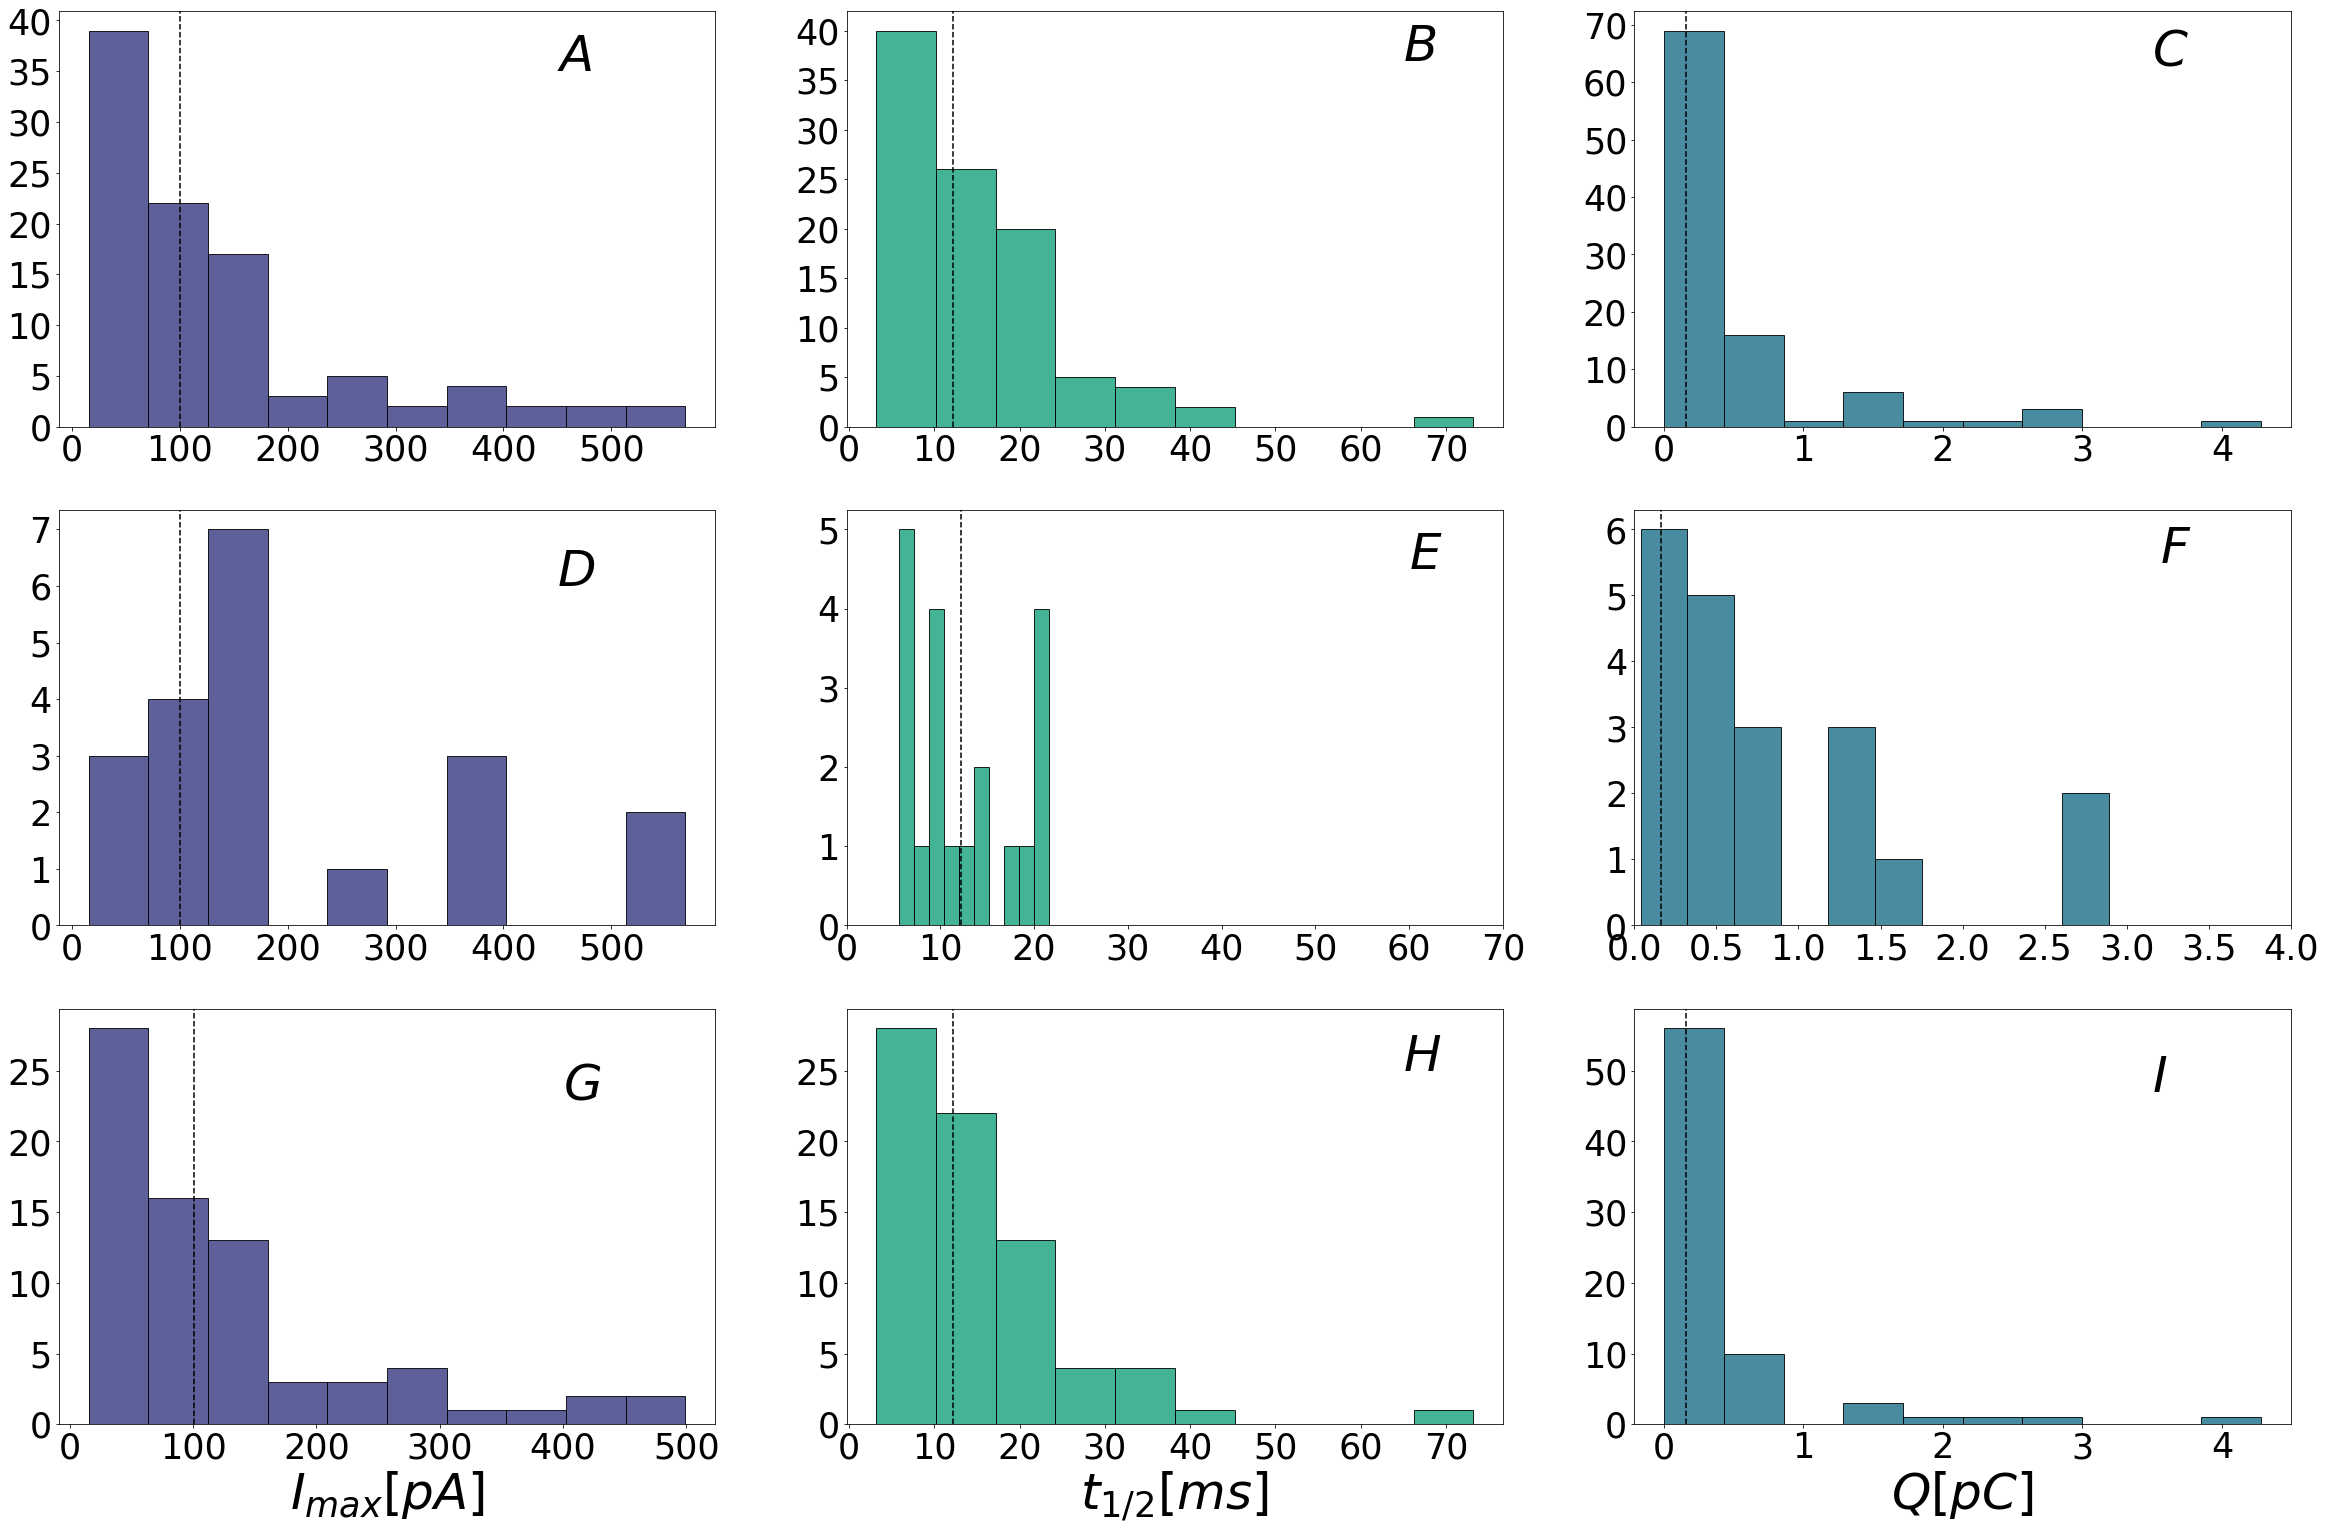

In [20]:
fig, axes = plt.subplots(3,3,figsize=(40, 26), sharex=False)
color = sns.color_palette("viridis", n_colors=4)

#I max: all data, no foot data, foot data
axes[0,0].hist(df['I_max[pA]'], bins=10 , color = color[0], alpha = 0.85, histtype='bar', ec='black')
axes[0,0].axvline(np.median(df['I_max[pA]']), ls = '--', color = 'black')
axes[0,0].grid('off')
axes[0,0].set_facecolor('white')
axes[0,0].text(450,35, '${A}$', fontsize=50)

axes[1,0].hist(with_foot_amplitude['I_max[pA]'],  color = color[0], alpha = 0.85, histtype='bar', ec='black')
axes[1,0].axvline(np.median(df['I_max[pA]']), ls = '--', color = 'black')
axes[1,0].grid('off')
axes[1,0].set_facecolor('white')
axes[1,0].text(450,6, '${D}$', fontsize=50)

axes[2,0].hist(without_foot['I_max[pA]'],  color = color[0], alpha = 0.85, histtype='bar', ec='black')
axes[2,0].axvline(np.median(df['I_max[pA]']), ls = '--', color = 'black')
axes[2,0].set_xlabel('$I_{max}[pA]$', fontsize = 50)
axes[2,0].grid('off')
axes[2,0].set_facecolor('white')
axes[2,0].text(400,23, '${G}$', fontsize=50)


#Q: all data, no foot data, foot data
axes[0,2].hist(df['Q[pC]'], bins=10 , color = color[1], alpha = 0.85, histtype='bar', ec='black')
axes[0,2].axvline(np.median(df['Q[pC]']), ls = '--', color = 'black')
axes[0,2].grid('off')
axes[0,2].set_facecolor('white')
axes[0,2].text(3.5,63, '${C}$', fontsize=50)

axes[1,2].hist(with_foot_amplitude['Q[pC]'],  color = color[1], alpha = 0.85, histtype='bar', ec='black')
axes[1,2].axvline(np.median(df['Q[pC]']), ls = '--', color = 'black')
axes[1,2].grid('off')
axes[1,2].set_facecolor('white')
axes[1,2].set_xlim(0,4)
axes[1,2].text(3.2,5.5, '${F}$', fontsize=50)

axes[2,2].hist(without_foot['Q[pC]'],  color = color[1], alpha = 0.85, histtype='bar', ec='black')
axes[2,2].axvline(np.median(df['Q[pC]']), ls = '--', color = 'black')
axes[2,2].set_xlabel('$Q[pC]$', fontsize = 50)
axes[2,2].grid('off')
axes[2,2].set_facecolor('white')
axes[2,2].text(3.5,47, '${I}$', fontsize=50)



#t_half: all data, no foot data, foot data
axes[0,1].hist(df['t_half[ms]'], bins=10 , color = color[2], alpha = 0.85, histtype='bar', ec='black')
axes[0,1].axvline(np.median(df['t_half[ms]']), ls = '--', color = 'black')
axes[0,1].grid('off')
axes[0,1].set_facecolor('white')
axes[0,1].text(65,37, '${B}$', fontsize=50)

axes[1,1].hist(with_foot_amplitude['t_half[ms]'],  color = color[2], alpha = 0.85, histtype='bar', ec='black')
axes[1,1].axvline(np.median(df['t_half[ms]']), ls = '--', color = 'black')
axes[1,1].grid('off')
axes[1,1].set_facecolor('white')
axes[1,1].set_xlim(0,70)
axes[1,1].text(60,4.5, '${E}$', fontsize=50)

axes[2,1].hist(without_foot['t_half[ms]'],  color = color[2], alpha = 0.85, histtype='bar', ec='black')
axes[2,1].axvline(np.median(df['t_half[ms]']), ls = '--', color = 'black')
axes[2,1].set_xlabel('$t_{1/2}[ms]$', fontsize = 50)
axes[2,1].grid('off')
axes[2,1].set_facecolor('white')
axes[2,1].text(65,25, '${H}$', fontsize=50)



for i in range(3):
    for j in range(3):
        for tick in axes[i,j].xaxis.get_major_ticks():
                        tick.label.set_fontsize(35) 
        for tick in axes[i,j].yaxis.get_major_ticks():
                        tick.label.set_fontsize(35) 

plt.show()




In [17]:
medians = pd.DataFrame([I_medians,Q_medians,t_medians], ['$I_{max}$','$Q$', '$t_{1/2}$' ])
medians.columns = ['Data','Foot','No Foot']
medians = medians.T

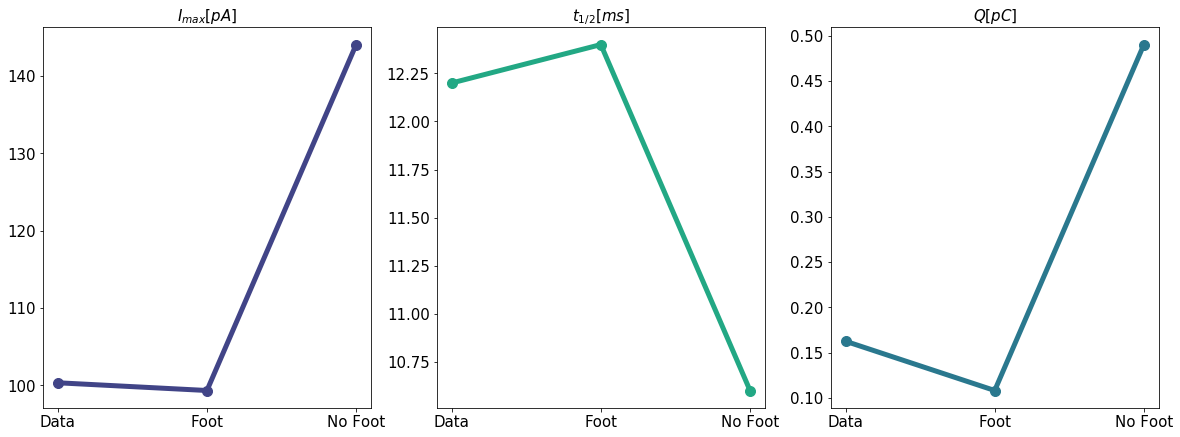

In [18]:
fig, axes = plt.subplots(1,3,figsize=(20, 7), sharex=True)
color = sns.color_palette("viridis", n_colors=4)


#I max: all data, no foot data, foot data
axes[0].plot(medians['$I_{max}$'], color = color[0], marker = '.', ms = 20, ls = '-', lw=5)
axes[0].grid('off')
axes[0].set_facecolor('white')

axes[0].set_title('$I_{max}[pA]$', fontsize = 15)


axes[2].plot(medians['$Q$'], color = color[1], marker = '.', ms = 20, ls = '-', lw=5)
axes[2].grid('off')
axes[2].set_facecolor('white')
axes[2].set_title('$Q[pC]$', fontsize = 15)

axes[1].plot(medians['$t_{1/2}$'], color = color[2], marker = '.', ms = 20, ls = '-', lw=5)
axes[1].grid('off')
axes[1].set_facecolor('white')
axes[1].set_title('$t_{1/2}[ms]$', fontsize = 15)


for i in range(len(axes)):
    for tick in axes[i].xaxis.get_major_ticks():
                    tick.label.set_fontsize(15) 
    for tick in axes[i].yaxis.get_major_ticks():
                    tick.label.set_fontsize(15) 


plt.show()

In [54]:
ISI = np.diff(df['t_peak'])
j = 82
s_time = recording[idx[j,0].astype(int):idx[j,1].astype('int'),0]
signal = recording[idx[j,0].astype(int):idx[j,1].astype('int'),1]

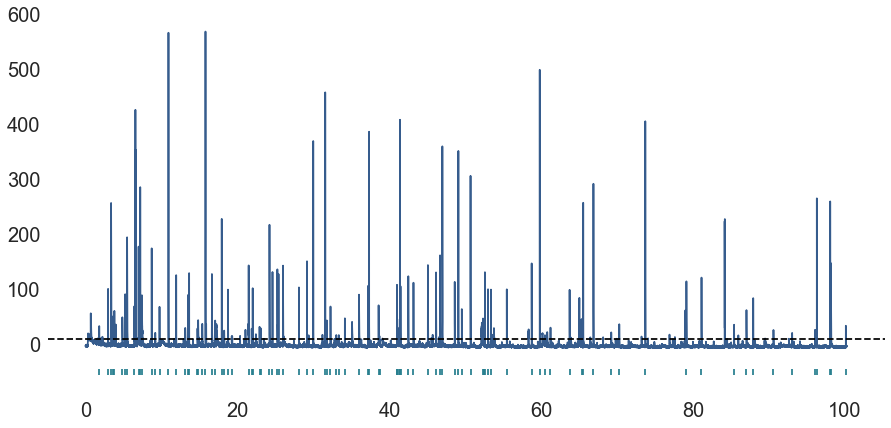

In [199]:
fig, axes = plt.subplots(1,1,figsize=(15, 7), sharey=True)
color = sns.color_palette("viridis", n_colors=6)


axes.plot(recording[:,0], recording[:,1], color = color[1])
axes.grid('off')
axes.set_facecolor('white')
axes.axhline(10, ls = '--', color = 'black')

axes.eventplot(df['t_peak'], lineoffsets=-50, color = color[2], linelengths=10)


for tick in axes.xaxis.get_major_ticks():
                        tick.label.set_fontsize(20) 
for tick in axes.yaxis.get_major_ticks():
                        tick.label.set_fontsize(20) 
plt.show()

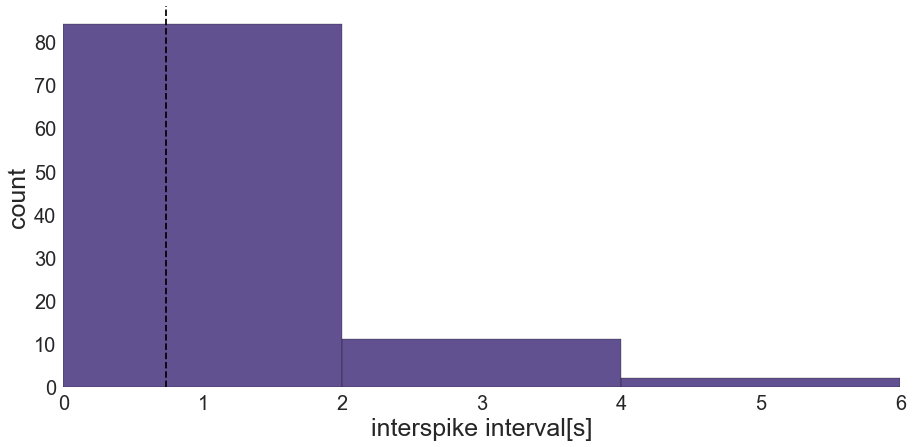

In [210]:
plt.figure(figsize=(15,7))

fig, axes = plt.subplots(1,1,figsize=(15, 7), sharey=True)
color = sns.color_palette("viridis", n_colors=6)
axes.hist(ISI, bins = [0,2,4,6,8,10], color = color[0], alpha = 0.85, histtype='bar', ec='black')
axes.axvline(np.median(ISI), ls = '--', color = 'black')
axes.set_xlim(0,6)
axes.grid('off')
axes.set_facecolor('white')
axes.set_xlabel('interspike interval[s]', fontsize = 25)
axes.set_ylabel('count', fontsize = 25)

for tick in axes.xaxis.get_major_ticks():
                        tick.label.set_fontsize(20) 
for tick in axes.yaxis.get_major_ticks():
                        tick.label.set_fontsize(20) 

plt.show()

In [88]:
Q = np.array(df['Q[pC]'])

In [192]:
Q.sum()*3.121e6

140110359.87926498

In [193]:
np.mean(ISI)

1.013554561589912

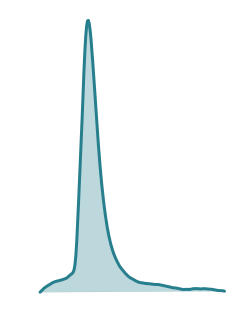

In [200]:
plt.subplot(122)
plt.plot(s_time,signal, 'k', color=color[2], lw = 3)
plt.fill(s_time,signal, color = color[2], alpha = 0.3)
plt.axis('off')
plt.show()

In [8]:
len(df)

98

In [9]:
len(without_foot)

73

In [10]:
len(with_foot_amplitude)

20